In [1]:
import torch

In [3]:
import torchvision

In [4]:
import torchvision.transforms as transforms

In [5]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [6]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

100.0%

Extracting ./data/cifar-10-python.tar.gz to ./data


In [7]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

In [9]:
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

Files already downloaded and verified


In [23]:
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

In [11]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

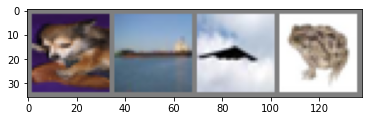

  dog  ship plane  frog


In [16]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [26]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        
        self.fc1 = nn.Linear(16 *6 *6 , 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        # ?
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def num_flat_features(self, x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        return num_features
    
net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [27]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [28]:
epochs = 2
for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, label = data
        
        optimizer.zero_grad()
        
        output = net(inputs)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
            
            test_loss, cnt = 0, 0
            for i, test_data in enumerate(testloader, 0):
                inputs, label = test_data
                output = net(inputs)
                loss = criterion(output, label)
                test_loss += loss
                cnt += 1
            print("test_loss "+str(test_loss/cnt))
            
                

[1,  2000] loss: 2.211
test_loss tensor(2.0086, grad_fn=<DivBackward0>)
[1,  4000] loss: 1.900
test_loss tensor(1.7564, grad_fn=<DivBackward0>)
[1,  6000] loss: 1.693
test_loss tensor(1.6217, grad_fn=<DivBackward0>)
[1,  8000] loss: 1.571
test_loss tensor(1.5250, grad_fn=<DivBackward0>)
[1, 10000] loss: 1.487
test_loss tensor(1.4453, grad_fn=<DivBackward0>)
[1, 12000] loss: 1.444
test_loss tensor(1.3981, grad_fn=<DivBackward0>)
[2,  2000] loss: 1.379
test_loss tensor(1.3409, grad_fn=<DivBackward0>)
[2,  4000] loss: 1.339
test_loss tensor(1.2979, grad_fn=<DivBackward0>)
[2,  6000] loss: 1.322
test_loss tensor(1.2643, grad_fn=<DivBackward0>)
[2,  8000] loss: 1.268
test_loss tensor(1.2440, grad_fn=<DivBackward0>)
[2, 10000] loss: 1.258
test_loss tensor(1.3168, grad_fn=<DivBackward0>)
[2, 12000] loss: 1.272
test_loss tensor(1.2534, grad_fn=<DivBackward0>)


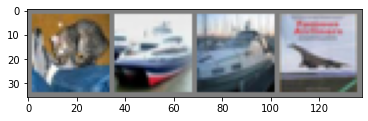

GroundTruth:    cat  ship  ship plane


In [29]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [30]:
outputs = net(images)

In [31]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship   car  ship


In [32]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 55 %
